In [1]:
import pandas as pd
import numpy as np
import nsepy
from nsepy import get_history as web
from datetime import date
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from nsepy.derivatives import get_expiry_date

In [3]:
tu = pd.read_csv('tuesday_ce_close.csv')
tu.set_index('Unnamed: 0',inplace=True)
tu.index = pd.to_datetime(tu.index)

In [4]:
weo=pd.read_csv('wednesday_ce_open.csv')
weo.set_index('Unnamed: 0', inplace = True)
weo.index = pd.to_datetime(weo.index)
weo.index = weo.index - timedelta(days=1)

wepre = weo[['Open(+1000)','Open(+1050)','Open(+1100)','Open(+1150)','Open(+1200)','Open(+1250)','Open(+1300)','Open(+1350)','Open(+1400)','Open(+1450)','High(+1450)']]
wepre.rename(columns = {'Open(+1000)':'we1000_open','Open(+1050)':'we1050_open','Open(+1100)':'we1100_open','Open(+1150)':'we1150_open','Open(+1200)':'we1200_open','Open(+1250)':'we1250_open','Open(+1300)':'we1300_open','Open(+1350)':'we1350_open','Open(+1400)':'we1400_open','Open(+1450)':'we1450_open','High(+1450)':'Predicted_high1450'}, inplace = True)

C:\Users\Vikas Kumar\AppData\Local\Temp\ipykernel_34400\3008035306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wepre.rename(columns = {'Open(+1000)':'we1000_open','Open(+1050)':'we1050_open','Open(+1100)':'we1100_open','Open(+1150)':'we1150_open','Open(+1200)':'we1200_open','Open(+1250)':'we1250_open','Open(+1300)':'we1300_open','Open(+1350)':'we1350_open','Open(+1400)':'we1400_open','Open(+1450)':'we1450_open','High(+1450)':'Predicted_high1450'}, inplace = True)


In [5]:
nf = pd.read_csv('nifty.csv')
nf.set_index('Date',inplace=True)
nf.index = pd.to_datetime(nf.index)

In [6]:
nftue = nf[nf['day_of_week']=='Tuesday']
nftue_close = nftue[['Close']]
nftue_close.rename(columns = {'Close':'Nifty_Tuesday_close'},inplace=True)

C:\Users\Vikas Kumar\AppData\Local\Temp\ipykernel_34400\2625121668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nftue_close.rename(columns = {'Close':'Nifty_Tuesday_close'},inplace=True)


In [10]:
nfwe= nf[nf['day_of_week']=='Wednesday']
nfwe_open = nfwe[['Open']]
nfwe_open.rename(columns={'Open':'Nifty_Wednesday_open'},inplace=True)
nfwe_open.index = nfwe_open.index - timedelta(days = 1)

C:\Users\Vikas Kumar\AppData\Local\Temp\ipykernel_34400\741118693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfwe_open.rename(columns={'Open':'Nifty_Wednesday_open'},inplace=True)


In [11]:
for_we = pd.concat([tu,nftue_close,nfwe_open,wepre],axis = 1)
for_we = for_we.dropna()

for_we

,Open(+1000),High(+1000),Low(+1000),Close(+1000),Change in OI(+1000),Open(+1050),High(+1050),Low(+1050),Close(+1050),Change in OI(+1050),...,we1050_open,we1100_open,we1150_open,we1200_open,we1250_open,we1300_open,we1350_open,we1400_open,we1450_open,Predicted_high1450
2022-01-04,0.90,1.10,0.30,0.40,49950.0,0.70,1.05,0.40,0.50,-22050.0,...,0.50,0.35,0.45,0.35,0.40,0.30,0.60,0.45,0.35,0.75
2022-01-11,0.75,1.05,0.45,0.55,9850.0,0.80,1.10,0.45,0.55,-38000.0,...,0.50,0.50,0.45,0.35,0.40,0.50,0.45,1.00,0.45,0.55
2022-03-08,4.70,4.85,2.35,3.10,3642150.0,3.90,4.40,2.05,2.60,-22850.0,...,2.05,1.30,1.65,1.50,1.60,1.30,2.40,1.15,1.40,1.50
2022-03-15,5.50,5.60,2.00,2.40,-193700.0,4.10,4.40,1.80,2.10,1045000.0,...,0.90,1.05,1.40,1.35,1.35,1.00,1.00,1.35,0.65,0.95
2022-03-22,1.45,1.70,0.90,1.00,-765850.0,1.65,1.65,0.75,0.90,-68850.0,...,0.80,0.90,0.85,0.70,0.65,0.65,0.70,0.80,0.75,1.05
2022-03-29,1.20,1.25,0.60,0.75,-27250.0,1.10,1.15,0.60,0.70,-178700.0,...,0.65,0.65,0.40,0.60,0.50,2.80,0.45,0.35,0.55,0.65
2022-04-05,1.85,2.40,1.10,1.20,21600.0,2.00,2.55,1.05,1.20,-70500.0,...,0.90,1.25,1.05,1.00,0.80,0.75,0.80,1.00,1.00,1.25
2022-04-19,2.05,3.15,1.60,2.10,-292050.0,2.25,2.75,1.50,1.95,-1590950.0,...,1.40,1.90,1.05,1.55,1.40,1.50,1.90,1.35,1.25,1.80
2022-04-26,1.50,1.55,0.85,1.00,-402050.0,1.65,1.65,0.80,1.05,26050.0,...,0.65,1.00,0.85,0.75,0.65,0.60,0.85,0.70,0.90,1.25
2022-05-10,1.20,2.65,1.20,1.60,-174450.0,2.00,2.45,1.25,1.55,-518700.0,...,1.25,1.45,1.20,1.40,1.25,1.25,1.65,1.25,1.10,1.85


In [12]:
X= for_we.drop('Predicted_high1450',axis=1)
Y=for_we['Predicted_high1450']



from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3,random_state=6, shuffle=True)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [13]:
print(lm.intercept_)

0.6986454399666198


In [14]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Open(+1000),-1.377393e-12
High(+1000),-9.266717e-13
Low(+1000),2.205878e-12
Close(+1000),2.353041e-12
Change in OI(+1000),-5.815574e-07
...,...
we1250_open,6.387059e-12
we1300_open,-3.174419e-11
we1350_open,3.777867e-12
we1400_open,6.510626e-12


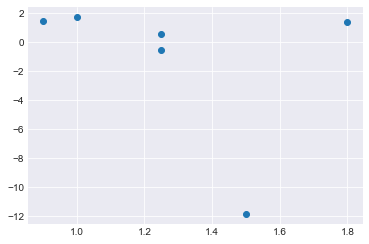

In [15]:
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

In [16]:
df = pd.DataFrame()
df['Actuals'] = y_test
df['Pred'] = predictions
df

,Actuals,Pred
2022-06-07,0.90,1.430892
2022-05-24,1.00,1.745791
2022-04-05,1.25,0.568886
2022-04-19,1.80,1.359575
2022-03-08,1.50,-11.907513
2022-04-26,1.25,-0.554504


In [17]:
df['MAPE'] = abs((df.Pred - df.Actuals) / df.Actuals) * 100
df['Accuracy'] = 100 - df.MAPE
df

,Actuals,Pred,MAPE,Accuracy
2022-06-07,0.90,1.430892,58.987952,41.012048
2022-05-24,1.00,1.745791,74.579098,25.420902
2022-04-05,1.25,0.568886,54.489159,45.510841
2022-04-19,1.80,1.359575,24.468054,75.531946
2022-03-08,1.50,-11.907513,893.834222,-793.834222
2022-04-26,1.25,-0.554504,144.360347,-44.360347


In [18]:
df.Accuracy.mean()

-108.45313875336956